In [42]:
import pandas as pd
from access_onedrive import create_onedrive_directdownload
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
onedrive_link = 'https://1drv.ms/x/s!AsCp_kE1E5Md6U4PwNcWkXp_SnEL?e=3gStJc'
link = create_onedrive_directdownload(onedrive_link)
df = pd.read_excel(link)

In [68]:
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 384095 entries, 0 to 388796
Data columns (total 2 columns):
ER_No              384095 non-null object
Triage_Datetime    384095 non-null object
dtypes: object(2)
memory usage: 8.8+ MB


E001570900    False
E001588894    False
E001617665    False
E001840918    False
E001490413    False
E001923029    False
E002002116    False
E001935367    False
E002050187    False
E001735294    False
E001993285    False
E001865319    False
E001663183    False
E001549060    False
E001720918    False
E001890162    False
E001906458    False
E001947045    False
E002005520    False
E001794775    False
E001958425    False
E002052065    False
E001416862    False
E001962449    False
E001880909    False
E001866826    False
E001597196    False
E001741571    False
E001802190    False
E002044657    False
              ...  
E001502381    False
E001780587    False
E001741459    False
E001414708    False
E001675014    False
E001572575    False
E001707871    False
E002050368    False
E001683816    False
E001654350    False
E001978770    False
E001476940    False
E002012259    False
E001803350    False
E001899571    False
E001510843    False
E001651364    False
E002039599    False
E001829149    False


In [56]:
#removing anomalies
df = df[df.Triage_Datetime != df.ER_No]
df.pop(df.columns[0])

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
388766    388766
388767    388767
388768    388768
388769    388769
388770    388770
388771    388771
388772    388772
388773    388773
388774    388774
388775    388775
388776    388776
388777    388777
388778    388778
388779    388779
388780    388780
388781    388781
388782    388782
388783    388783
388784    388784
388785    388785
388786    388786
388787    388787
388788    388788
388789    388789
388790    388790
388792    388792
388793    388793
388794    3887

In [57]:
#fetching date from the datetime column
df['Triage_Datetime'] = pd.to_datetime(df['Triage_Datetime'])
df['Triage_Datetime'] = df['Triage_Datetime'].dt.date
df.head(5)

,ER_No,Triage_Datetime
0,E001467306,2019-04-30
1,E001461259,2019-04-19
2,E001453586,2019-04-05
3,E001455608,2019-04-09
4,E001467427,2019-04-30


In [113]:
new_df = df.groupby(['Triage_Datetime'])['Triage_Datetime'].count().reset_index(name='Count of Patients')
# new_df.index = new_df['Triage_Datetime']
# del new_df['Triage_Datetime']
new_df.head(5)
# new_df.info()


,Triage_Datetime,Count of Patients
0,2019-01-01,348
1,2019-01-02,371
2,2019-01-03,373
3,2019-01-04,361
4,2019-01-05,373


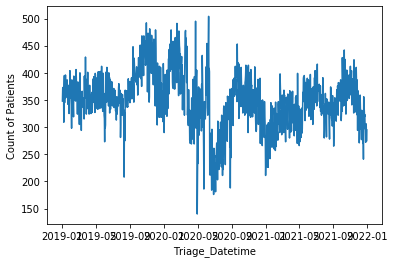

In [110]:
sns.lineplot(x = 'Triage_Datetime', y = 'Count of Patients', data = new_df)

In [111]:
#making date column the index
# new_df['Date'] = new_df.index
# del new_df['Triage_Datetime']

In [120]:

# x-label = date; y-label = count
new_df['Triage_Datetime'] = pd.to_datetime(new_df['Triage_Datetime'])
train = new_df[new_df['Triage_Datetime'] < pd.to_datetime("2021-09", format='%Y-%m')]
test = new_df[new_df['Triage_Datetime'] >= pd.to_datetime("2021-09", format='%Y-%m')]
train.head(5)

,Triage_Datetime,Count of Patients
0,2019-01-01,348
1,2019-01-02,371
2,2019-01-03,373
3,2019-01-04,361
4,2019-01-05,373


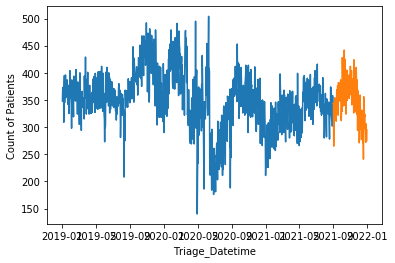

In [122]:
sns.lineplot(x = 'Triage_Datetime', y = 'Count of Patients', data = train)
sns.lineplot(x = 'Triage_Datetime', y = 'Count of Patients', data = test)

MODELLING

In [130]:
# from pmdarima.arima import auto_arima
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'